In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_circles
from sklearn.svm import SVC
from sklearn import metrics

In [4]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

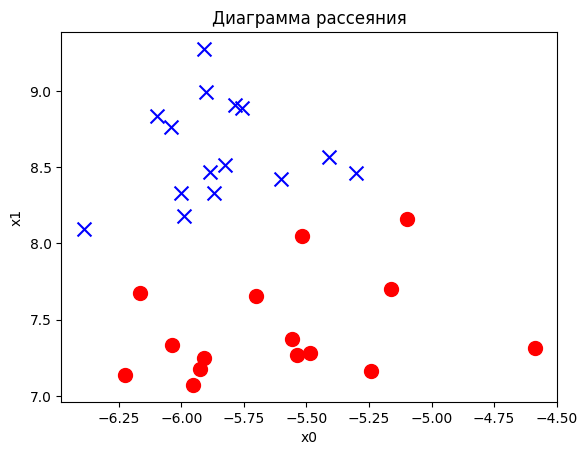

In [7]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [8]:
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

In [9]:
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

In [10]:
svm_linear.intercept_

array([-64.2533988])

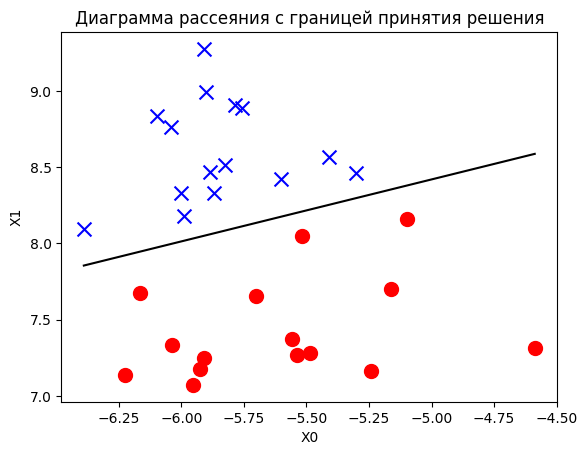

In [13]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [14]:
svm_linear.support_vectors_

array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

In [15]:
svm_linear.support_

array([ 0,  8, 29], dtype=int32)

In [16]:
svm_linear.n_support_

array([1, 2], dtype=int32)

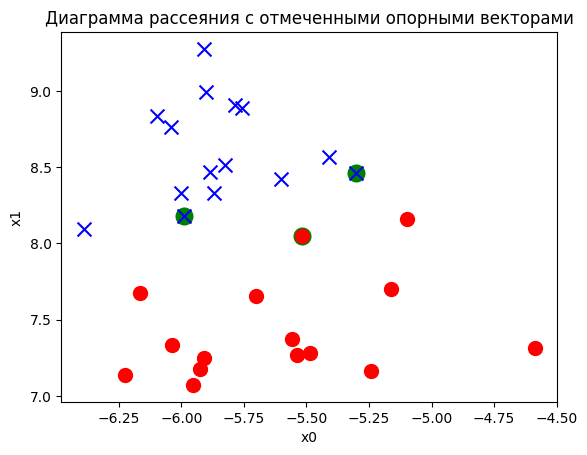

In [17]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

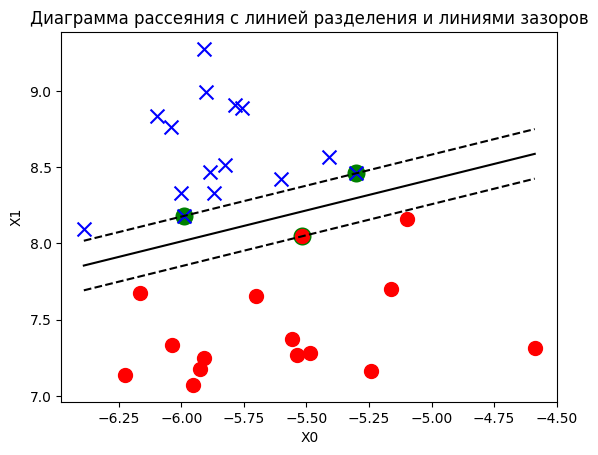

In [18]:
plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

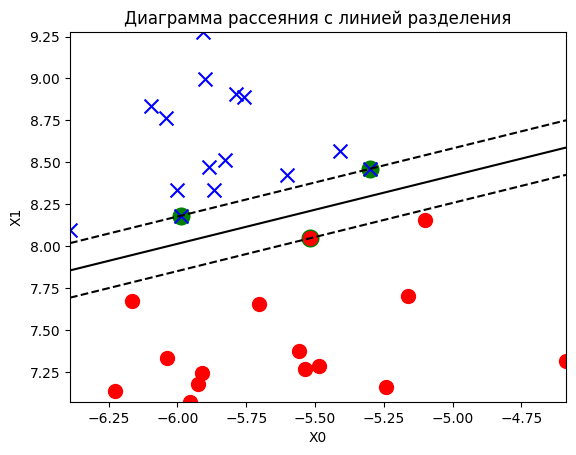

In [19]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [20]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

In [21]:
y_pred =  svm_linear.predict(X)

In [24]:
metrics.accuracy_score(y, y_pred)

1.0

In [25]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

In [ ]:
observation_new1 = [[-5.25, 7.5]]
# Task 2
observation_new2 = [[-5.25, 9.0]]

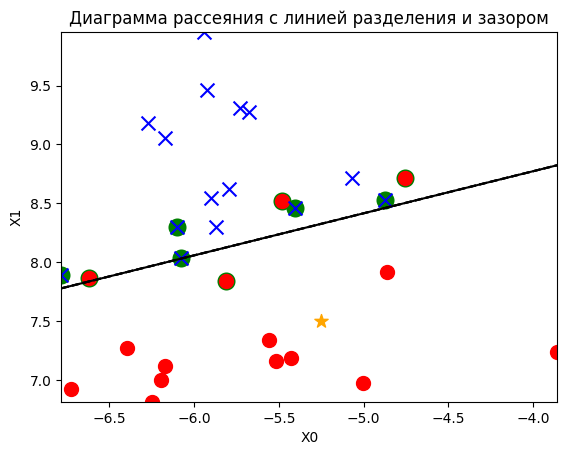

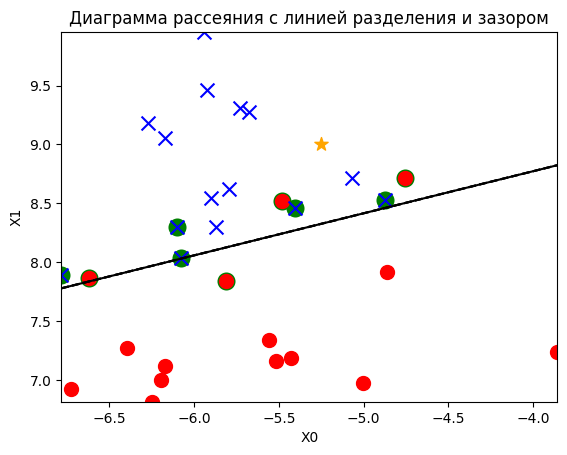

In [ ]:
plt.scatter(observation_new1[0][0], observation_new1[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

# Task 2
plt.scatter(observation_new2[0][0], observation_new2[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [ ]:
svm_linear.decision_function(observation_new1)
# Task 2
svm_linear.decision_function(observation_new2)

array([66302.62027657])

In [ ]:
print("Frist point predict: ", svm_linear.predict(observation_new1))
# Task 2
print("Second point predict: ", svm_linear.predict(observation_new2))

Frist point predict:  [0]
Second point predict:  [1]


# Линейно неразделимые данные с зазором

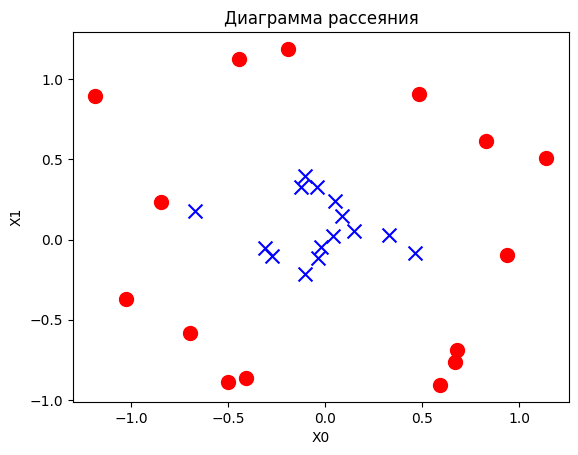

In [52]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [53]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)

In [54]:
svm_rbf.n_support_
svm_rbf.support_
svm_rbf.support_vectors_

array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

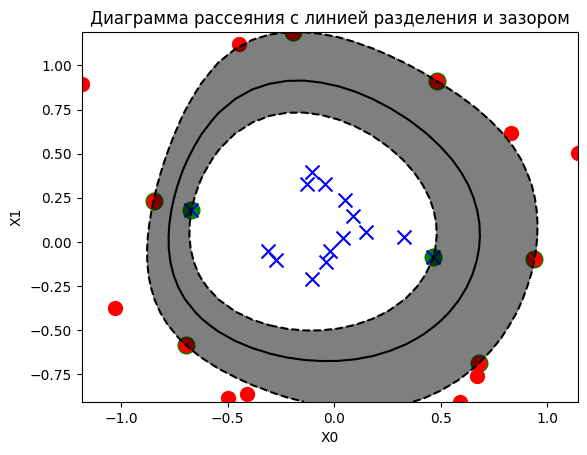

In [55]:
plot_decision_regions(X, y, svm_rbf)

In [56]:
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)

array([[7, 8],
       [8, 7]])

# Данные без зазора

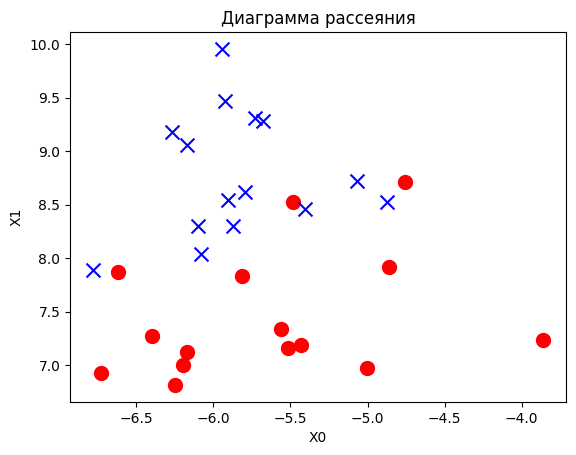

In [57]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [58]:
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y)

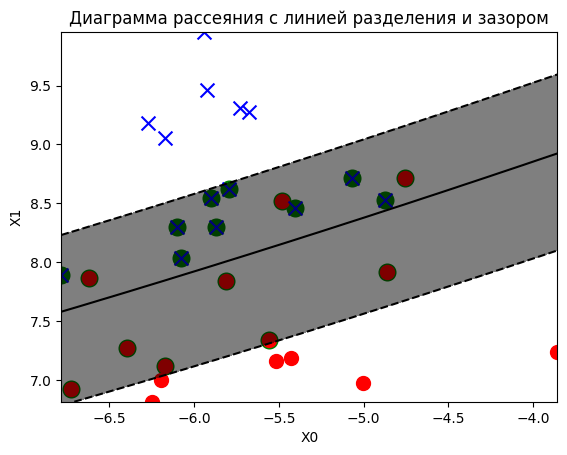

In [59]:
plot_decision_regions(X, y, svm_poly)

In [60]:
svm_poly.n_support_

array([9, 9], dtype=int32)

In [61]:
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

# Task 1

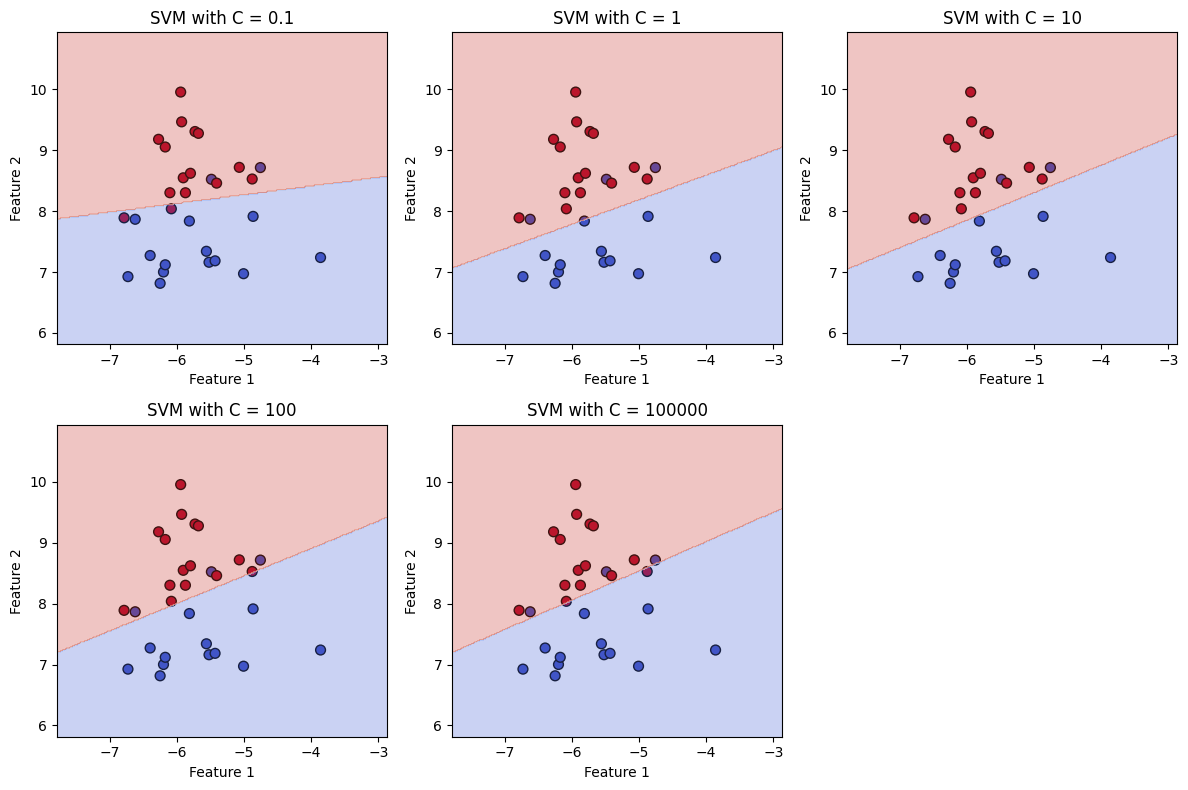

In [73]:
C_values = [0.1, 1, 10, 100, 10**5]

# Plotting the decision boundaries for different C values
plt.figure(figsize=(12, 8))

for i, C_val in enumerate(C_values, 1):
    plt.subplot(2, 3, i)
    
    # Train SVM with a linear kernel and the given C value
    svm = SVC(kernel='linear', C=C_val)
    svm.fit(X, y)
    
    # Plotting the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k')

    # Creating a mesh grid for the decision boundary
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the classification for each point in the grid
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    # Plot the SVM hyperplane and margins
    plt.title(f"SVM with C = {C_val}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

### the parameter C is a regularization parameter that controls the trade-off between achieving a low error on the training data and maintaining a simpler (more generalizable) decision boundary.

# Task 3